In [1]:
import pandas as pd
from urllib.parse import quote
b = b'/:?='
url=quote("https://raw.githubusercontent.com/1205129045x/baiduindex/master/月度数据.csv", safe=b)
df = pd.read_csv(url, encoding='gbk')

In [22]:
from datetime import datetime as datetime

In [2]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [19]:
import math
math.log(10,2)

3.3219280948873626

In [20]:
df['log_index'] = [math.log(i,10) for i in df['index']]

In [27]:
df['log_index']

0      4.207835
1      4.072419
2      4.042353
3      4.080246
4      4.061530
         ...   
347    3.463390
348    3.413619
349    3.565801
350    3.717174
351    3.878349
Name: log_index, Length: 352, dtype: float64

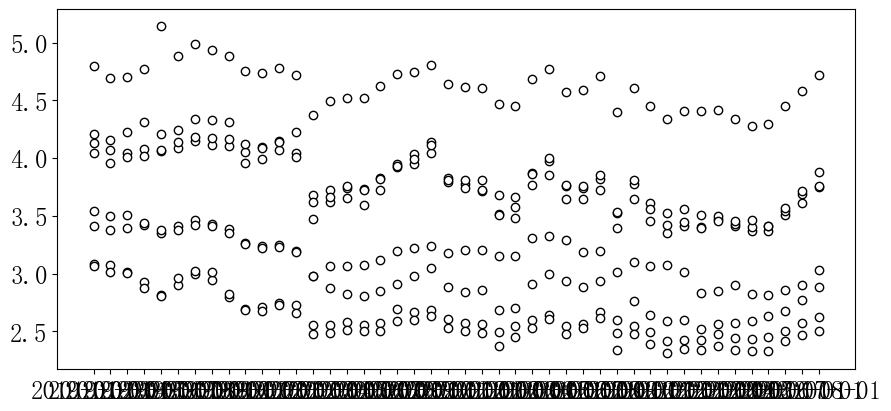

In [36]:
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.plot(df['date'],df['log_index'] , "o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

<AxesSubplot:xlabel='date', ylabel='log_index'>

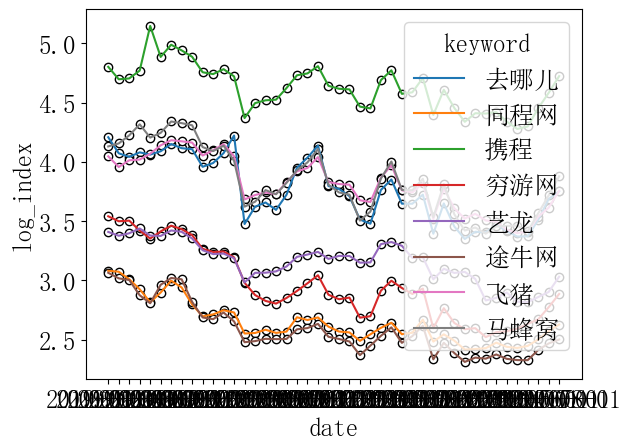

In [45]:
from matplotlib import rcParams
# rcParams配置文件，用来定义各种变量的，这里用来定义字体
config = {
    "font.family":'serif',
    "font.size": 18,
    "mathtext.fontset":'stix', # 表示可以用latex写公式，stix类似于Time News Romen
    "font.serif": ['SimSun'], # 表示中文用的是宋体
}
rcParams.update(config) # 后更新配置，防止字体设置被覆盖
import seaborn as sns
fig, ax = plt.subplots(1,1)
ax.plot(df['date'],df['log_index'] , "o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.
sns.lineplot(x='date',y='log_index',hue='keyword',data=df)

In [87]:
df

,keyword,date,index
0,去哪儿,2019-01,16137.451613
1,去哪儿,2019-02,11814.607143
2,去哪儿,2019-03,11024.354839
3,去哪儿,2019-04,12029.466667
4,去哪儿,2019-05,11522.064516
...,...,...,...
347,马蜂窝,2022-04,2906.633333
348,马蜂窝,2022-05,2591.903226
349,马蜂窝,2022-06,3679.600000
350,马蜂窝,2022-07,5214.032258


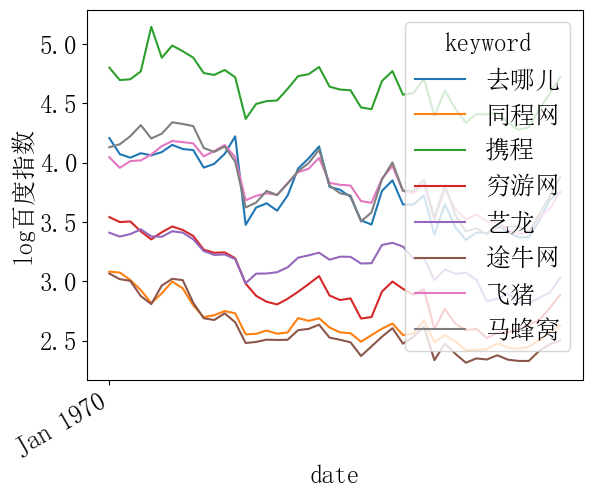

In [37]:
fig, ax = plt.subplots(1,1)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

# plt.xticks(rotation=90)


# sns.lineplot(data=data_df, x='date', y='index', hue='keyword',style="keyword")
sns.lineplot(x='date',y='log_index',hue='keyword',data=df)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
plt.ylabel('log百度指数')
plt.show()

